In [3]:
import numpy as np
from scipy import linalg
with open('matrix_data.txt') as file:
    array2d = np.array([[float(digit) for digit in line.split()] for line in file]) #converting text file elements into array
    print(array2d)
lambdas = linalg.eig(array2d, b=None, left=False, right=False, overwrite_a=False, 
                     overwrite_b=False, check_finite=True, homogeneous_eigvals=False)
spectralradius = max(abs(lambdas))

i_max = 100000

def spectral_theorem(i):
    product = np.linalg.matrix_power(array2d,i)
    nu = np.full((10, 1),2) # creating a matrix of dimension ten by one and every element as two.
    vector = product @ nu 
    normvector = linalg.norm(vector, ord = 2)
    converge = normvector**(1/i)
    difference = converge - spectralradius
    return difference
       
sequence = []

for iter in range(1,i_max+1):
    sequence.append(spectral_theorem(iter))
'''The last element of the list/sequence would be the answer.'''   
sequence[-1]
    

[[5.64375001e-01 1.69296089e-01 6.68370874e-04 1.38986425e-08
  1.17082946e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.63288290e-02 5.64167366e-01 1.55867820e-01 5.04151137e-04
  8.43728314e-09 6.13966018e-16 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.05704583e-05 5.82757782e-02 6.01626205e-01 1.42471751e-01
  3.77063900e-04 5.07691059e-09 3.21954892e-16 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.96888916e-10 7.76222176e-05 7.27953504e-02 6.38004747e-01
  1.29278334e-01 2.79621278e-04 3.02802912e-09 1.12552323e-16
  0.00000000e+00 0.00000000e+00]
 [1.90685706e-17 7.51615550e-10 1.18125429e-04 9.02416558e-02
  6.72837429e-01 1.16442325e-01 2.05597177e-04 1.79011656e-09
  1.18041618e-16 0.00000000e+00]
 [5.29411812e-27 4.47205133e-17 1.41084035e-09 1.78227649e-04
  1.11027402e-01 7.05652415e-01 1.04099615e-01 1.49881091e-04
  1.04896409e-09 0.00000000e+00]
 [8.27297054e-39 1.54000315e-26 1.03946325e-16 2.62493149e

1.8966470473946728e-05

18.562695626499732


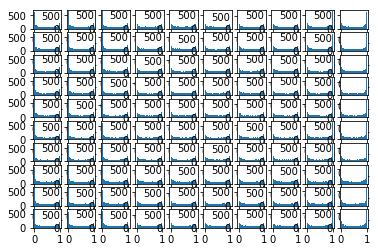

In [8]:
import numpy as np
import matplotlib
import time
from matplotlib import pyplot as plt
from numba import jit

timeseries_size=10000

@jit
def gx(x):
    gx = 4 * x * (1 - x)
    return gx

@jit
def timeseries(x):
    A = np.array(x)
    A = np.append(A, gx(x))
    iter = 1
    while iter < timeseries_size:
        A = np.append(A, gx(A[-1]))
        iter += 1
    return A
@jit
def initial_conditions():
    initial_conditions = np.empty(100)
    for i in range(100):
        initial_conditions[i] = np.random.uniform(0,1,1)
    return initial_conditions
    
time_start = time.clock()

init = initial_conditions()
fig, ax = plt.subplots(10,10)


for i in range(10):
    for j in range(10):
        ax[i,j].hist(timeseries(init[i+j]), bins = 100, )

time_elapsed = (time.clock()-time_start)       
print(time_elapsed)
fig.savefig('plot.pdf')

## Solution of Question 3

We are given the following-
(i) $g$ is continuous at $\hat{x}$

(ii) $g^t(\hat{x}) \rightarrow \hat{x}$ as $x \rightarrow \infty$

Proof-
Since we are given that $g^t(x) \rightarrow \hat{x}$,  there exists  $x^\prime, \epsilon, \delta_1 > 0$ such that:
$$|g(x^\prime) - \hat{x}| < \epsilon/2 $$ if $$|x^\prime - \hat{x}|<\delta_1$$

We are also given that $g(x)$ is continuous at $\hat{x}$, which means that there exists $\delta_2 > 0$ such that 
$$\Rightarrow |g(x^\prime) - g(\hat{x})| < \epsilon/2$$ if $$|x^\prime - \hat{x}|<\delta_2$$

Choosing $\delta = \min(\delta_1, \delta_2)$, we have 
$$|g(x^\prime) - \hat{x}| < \epsilon/2 $$ and 
$$|g(x^\prime) - g(\hat{x})| < \epsilon/2$$ 
if $$|x^\prime - \hat{x}|<\delta$$

Therefore we have
$$|g(\hat{x}) - \hat{x}| = |g(\hat{x}) + g(x^\prime) - g(x^\prime) - \hat{x}|$$
$$ = |g(\hat{x}) - g(x^\prime) + g(x^\prime) - \hat{x}|$$
$$ \le |g(\hat{x}) - g(x^\prime)| + |g(x^\prime) - \hat{x}|$$ 
$$ < \epsilon/2 + \epsilon/2 = \epsilon$$

if $|\hat{x} - x^\prime|< \delta$ i.e $x^\prime \ne \hat{x}$

Which shows that the distance between $g(\hat{x})$ and $\hat{x}$ is arbitrarily small. Hence $g(\hat{x}) \rightarrow \hat{x}$ 

